In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head() ##this returns the first five rows of the dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape ##returns the no. of rows and columns
df.dtypes
df.describe
df.isnull().sum() ##check for null values
df.duplicated().any() ##check for duplicate values

False

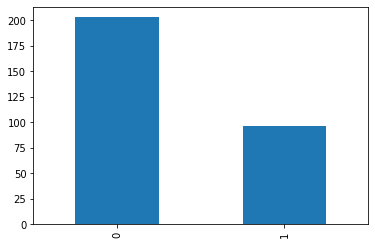

In [4]:
df['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.show()

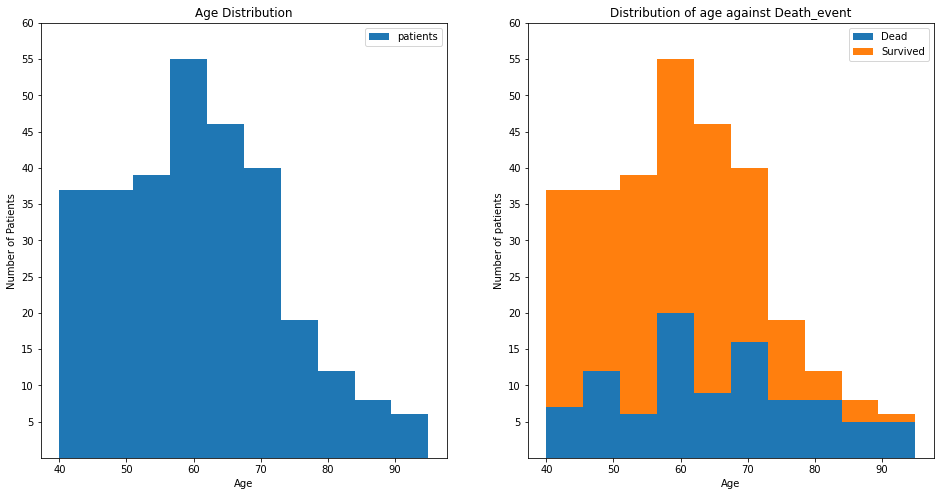

In [5]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['age'],label = 'patients')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[0].legend()
ax[0].set_title('Age Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['age'],df[df['DEATH_EVENT']==0]['age']],stacked=True,label=['Dead','Survived'])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([5,10,15,20,25,30,35,40,45,50,55,60])
ax[1].set_title('Distribution of age against Death_event')
ax[1].legend()


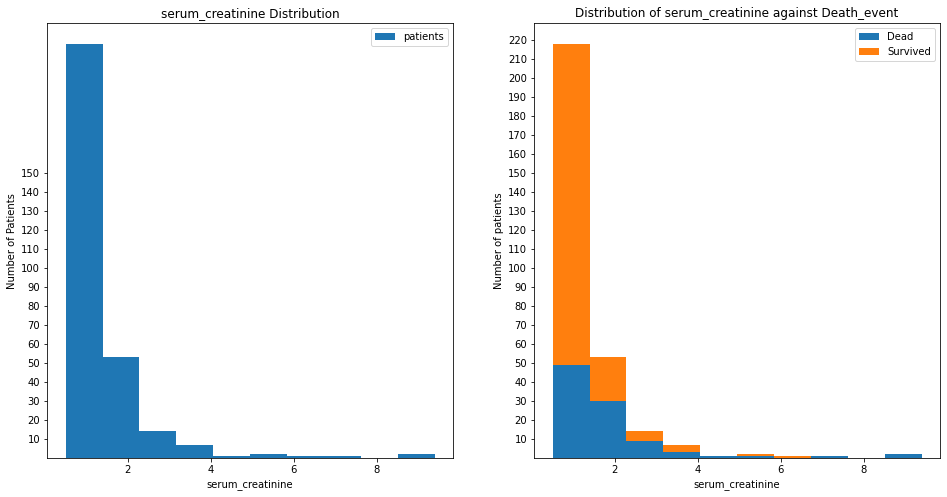

In [6]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].hist(df['serum_creatinine'], label = 'patients')
ax[0].set_xlabel('serum_creatinine')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('serum_creatinine Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['serum_creatinine'],df[df['DEATH_EVENT']==0]['serum_creatinine']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('serum_creatinine')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks(([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]))
ax[1].set_title('Distribution of serum_creatinine against Death_event')
ax[1].legend()

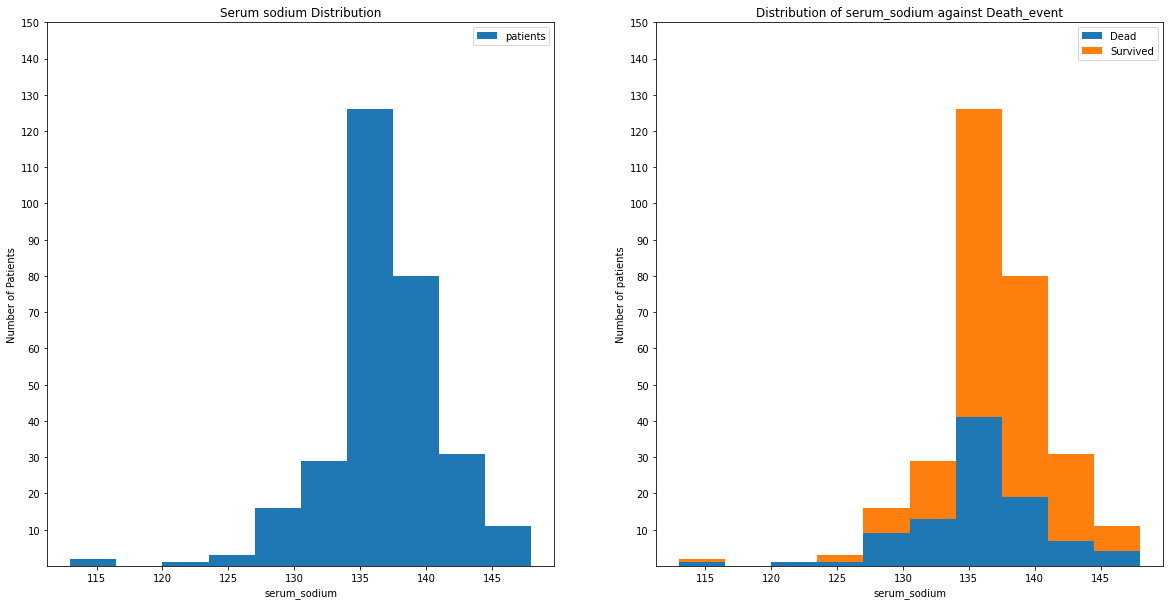

In [7]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].hist(df['serum_sodium'], label = 'patients')
ax[0].set_xlabel('serum_sodium')
ax[0].set_ylabel('Number of Patients')
ax[0].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[0].legend()
ax[0].set_title('Serum sodium Distribution')
ax[1].hist(x = [df[df['DEATH_EVENT']==1]['serum_sodium'],df[df['DEATH_EVENT']==0]['serum_sodium']], stacked=True, label=['Dead','Survived'])
ax[1].set_xlabel('serum_sodium')
ax[1].set_ylabel('Number of patients')
ax[1].set_yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Distribution of serum_sodium against Death_event')
ax[1].legend()

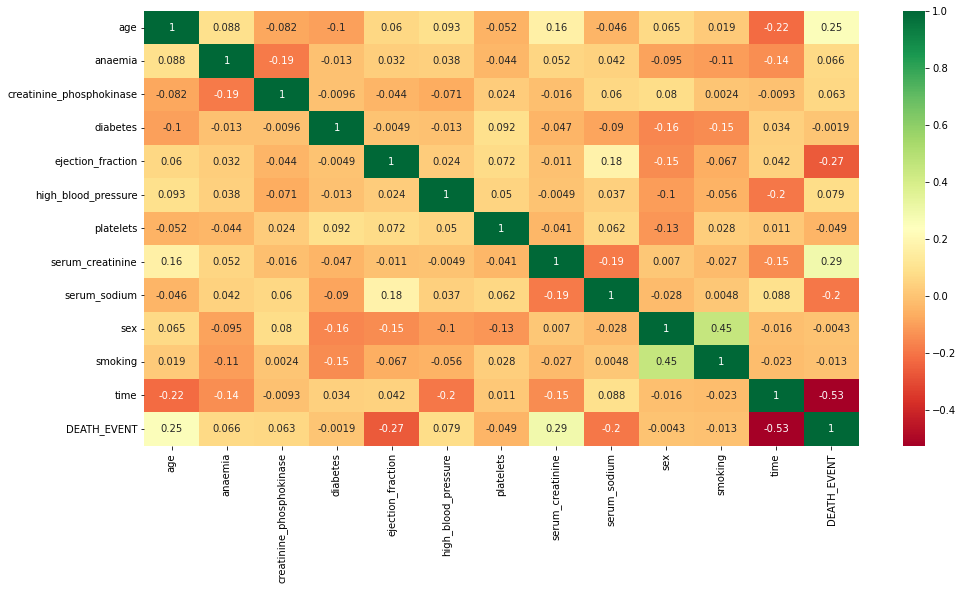

In [8]:
plt.figure(figsize=[16,8])
corr = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

In [9]:
features = df[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
X = df[['age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine']]
y = df['DEATH_EVENT']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(X_test)

,age,ejection_fraction,serum_sodium,serum_creatinine
206,40.000,40,141,0.80
188,60.667,40,136,1.00
12,45.000,30,137,1.10
219,55.000,35,140,0.70
237,70.000,30,132,1.20
136,65.000,60,137,0.90
228,65.000,25,130,5.00
205,50.000,45,136,1.00
52,60.000,62,146,6.80
108,63.000,38,133,1.10


In [11]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : \n\n" , confusion_matrix(predictions,y_test))
print("Classification Report : \n\n" , classification_report(predictions,y_test),"\n")

Confusion Matrix : 

 [[33 11]
 [ 4 12]]
Classification Report : 

               precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.52      0.75      0.62        16

    accuracy                           0.75        60
   macro avg       0.71      0.75      0.72        60
weighted avg       0.79      0.75      0.76        60
 



In [12]:
import pickle
pickle.dump(svm, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))
print(model)

SVC()


In [13]:
pip install Flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install gunicorn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
